# Phase I: Detailed Data Exploration - SQuAD v1.1

This notebook provides a comprehensive analysis of the Stanford Question Answering Dataset (SQuAD) v1.1. We will explore dataset statistics, length distributions, and answer patterns to inform our model choices and preprocessing hyperparameters.

In [2]:
    # Phase I: Detailed Data Exploration - SQuAD v1.1


from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import numpy as np
print("All imports successful!")
sns.set_theme(style="whitegrid")
print("Trying alternative approach...")
# Fallback to basic analysis without visualization
from datasets import load_dataset
import pandas as pd
import os
import json
print("Basic imports successful - proceeding without visualization")

c:\Users\My Device\Desktop\Question Answering with Transformers_NLP\localenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All imports successful!
Trying alternative approach...
Basic imports successful - proceeding without visualization


## 1. Load Dataset

In [3]:
print("Downloading SQuAD v1.1 dataset...")
dataset = load_dataset("squad")
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

## 2. Dataset Overview

Let's look at the basic statistics of the train and validation splits.

In [4]:
splits = ['train', 'validation']
summary = []

for split in splits:
    df = dataset[split].to_pandas()
    summary.append({
        'Split': split,
        'Total Records': len(df),
        'Unique Contexts': df['context'].nunique(),
        'Unique Titles': df['title'].nunique()
    })

pd.DataFrame(summary)

,Split,Total Records,Unique Contexts,Unique Titles
0,train,87599,18891,442
1,validation,10570,2067,48


## 3. Length Analysis

Understanding the distribution of context, question, and answer lengths is crucial for setting `max_length` in tokenization.

In [5]:
train_df = dataset['train'].to_pandas()

# Calculate lengths in words (approximation of tokens)
train_df['context_len'] = train_df['context'].apply(lambda x: len(x.split()))
train_df['question_len'] = train_df['question'].apply(lambda x: len(x.split()))
train_df['answer_len'] = train_df['answers'].apply(lambda x: len(x['text'][0].split()))

train_df[['context_len', 'question_len', 'answer_len']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,context_len,question_len,answer_len
count,87599.000000,87599.000000,87599.000000
mean,119.763125,10.061108,3.162159
std,49.365000,3.559230,3.392334
min,20.000000,1.000000,1.000000
25%,89.000000,8.000000,1.000000
50%,110.000000,10.000000,2.000000
75%,142.000000,12.000000,3.000000
90%,183.000000,15.000000,7.000000
95%,213.000000,17.000000,10.000000
99%,282.000000,21.000000,18.000000


### Visualizing Distributions

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Method 1: matplotlib/seaborn available


c:\Users\My Device\Desktop\Question Answering with Transformers_NLP\localenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\My Device\Desktop\Question Answering with Transformers_NLP\localenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\My Device\Desktop\Question Answering with Transformers_NLP\localenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


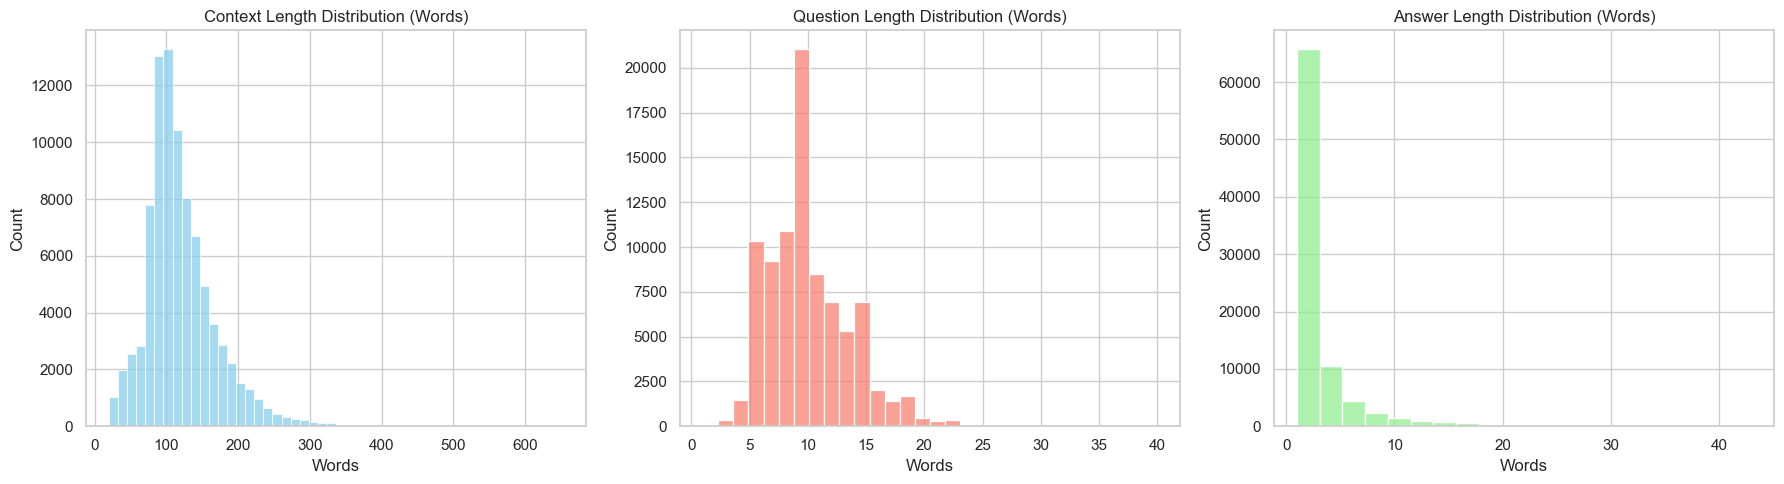

In [7]:
### Visualizations - Multiple Approaches

# Try different plotting methods
try:
    # Method 1: Try matplotlib import
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("Method 1: matplotlib/seaborn available")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    sns.histplot(train_df['context_len'], bins=50, ax=axes[0], color='skyblue')
    axes[0].set_title('Context Length Distribution (Words)')
    axes[0].set_xlabel('Words')
    
    sns.histplot(train_df['question_len'], bins=30, ax=axes[1], color='salmon')
    axes[1].set_title('Question Length Distribution (Words)')
    axes[1].set_xlabel('Words')
    
    sns.histplot(train_df['answer_len'], bins=20, ax=axes[2], color='lightgreen')
    axes[2].set_title('Answer Length Distribution (Words)')
    axes[2].set_xlabel('Words')
    
    plt.tight_layout()
    plt.show()
    
except ImportError as e:
    print(f"Method 1 failed: {e}")
    
    try:
        # Method 2: Try plotly (often works better in notebooks)
        import plotly.express as px
        import plotly.graph_objects as go
        from plotly.subplots import make_subplots
        print("Method 2: plotly available")
        
        fig = make_subplots(rows=1, cols=3, subplot_titles=('Context Length', 'Question Length', 'Answer Length'))
        
        fig.add_trace(go.Histogram(x=train_df['context_len'], name='Context'), row=1, col=1)
        fig.add_trace(go.Histogram(x=train_df['question_len'], name='Question'), row=1, col=2)
        fig.add_trace(go.Histogram(x=train_df['answer_len'], name='Answer'), row=1, col=3)
        
        fig.update_layout(height=400, showlegend=False)
        fig.show()
        
    except ImportError:
        print("Method 2 failed: plotly not available")
        
        # Method 3: Basic text-based visualization
        print("Method 3: Text-based visualization")
        
        def simple_histogram(data, bins, title):
            min_val, max_val = data.min(), data.max()
            bin_width = (max_val - min_val) / bins
            bin_counts = [0] * bins
            
            for val in data:
                bin_idx = min(int((val - min_val) / bin_width), bins - 1)
                bin_counts[bin_idx] += 1
            
            print(f"\n{title}:")
            for i, count in enumerate(bin_counts):
                bar = '█' * (count // max(bin_counts) * 50)  # Scale to 50 chars max
                bin_start = min_val + i * bin_width
                bin_end = bin_start + bin_width
                print(f"{bin_start:5.0f}-{bin_end:5.0f}: {bar} ({count})")
        
        simple_histogram(train_df['context_len'], 10, "Context Length Distribution")
        simple_histogram(train_df['question_len'], 8, "Question Length Distribution") 
        simple_histogram(train_df['answer_len'], 6, "Answer Length Distribution")

## 4. Topic Analysis

What are the most frequent topics in the training set?

In [8]:
## 4. Topic Analysis


print("Top 15 Topics in SQuAD v1.1:")
top_topics = train_df['title'].value_counts()[:15]
for i, (title, count) in enumerate(top_topics.items(), 1):
    print(f"{i:2d}. {title}: {count}")

Top 15 Topics in SQuAD v1.1:
 1. New_York_City: 817
 2. American_Idol: 802
 3. Beyoncé: 758
 4. Frédéric_Chopin: 697
 5. Queen_Victoria: 680
 6. Buddhism: 610
 7. New_Haven,_Connecticut: 602
 8. 2008_Sichuan_earthquake: 521
 9. 2008_Summer_Olympics_torch_relay: 500
10. Muammar_Gaddafi: 489
11. Hellenistic_period: 469
12. Napoleon: 458
13. Middle_Ages: 452
14. Modern_history: 448
15. Portugal: 435


## 5. Sample Record Inspection

Let's look at a few examples, including a long context and a short context.

In [9]:
print("--- Long Context Example ---")
long_sample = train_df.sort_values(by='context_len', ascending=False).iloc[0]
print(f"Title: {long_sample['title']}")
print(f"Context Length: {long_sample['context_len']} words")
print(f"Question: {long_sample['question']}")
print(f"Answer: {long_sample['answers']['text'][0]}")

print("\n--- Short Context Example ---")
short_sample = train_df.sort_values(by='context_len', ascending=True).iloc[0]
print(f"Title: {short_sample['title']}")
print(f"Context Length: {short_sample['context_len']} words")
print(f"Question: {short_sample['question']}")
print(f"Answer: {short_sample['answers']['text'][0]}")

--- Long Context Example ---
Title: Sahara
Context Length: 653 words
Question: During daytime how high can the temperatures reach?
Answer: 80 °C (176 °F)

--- Short Context Example ---
Title: Internet_service_provider
Context Length: 20 words
Question: What type of organization provides internet access?
Answer: ISPs


## 6. Save Sample for Reference

In [10]:
## 6. Data Quality Analysis


# Check answer positions within contexts
answer_positions = []
for item in dataset['train']:
    if item['answers']['answer_start']:
        answer_positions.append(item['answers']['answer_start'][0])

print(f"Mean answer start position: {np.mean(answer_positions):.1f} characters")
print(f"Median answer start position: {np.median(answer_positions):.1f} characters")

# Check for questions starting with common question words
from collections import Counter
question_start_words = [q.split()[0].lower() for q in train_df['question'] if q.split()]
start_word_counts = Counter(question_start_words)

print("\nTop 10 question starting words:")
for word, count in start_word_counts.most_common(10):
    print(f"  {word}: {count}")

# Check for empty answers or questions
empty_answers = train_df['answer_len'].apply(lambda x: x == 0).sum()
empty_questions = train_df['question_len'].apply(lambda x: x == 0).sum()

print(f"\nEmpty answers: {empty_answers}")
print(f"Empty questions: {empty_questions}")

Mean answer start position: 319.9 characters
Median answer start position: 262.0 characters

Top 10 question starting words:
  what: 37593
  who: 8150
  how: 8124
  when: 5459
  in: 4352
  which: 4159
  where: 3291
  the: 2318
  why: 1201
  on: 590

Empty answers: 0
Empty questions: 0
